In [56]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.stats import norm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_boston
import warnings
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.datasets import load_iris
from sklearn.ensemble import ExtraTreesClassifier
from datetime import datetime, timedelta
from sklearn.datasets import make_blobs
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
import matplotlib as mpl
from sklearn import model_selection
import matplotlib.pylab as pylab
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVC

In [57]:
data = pd.read_csv("datatest.csv")

In [58]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [59]:
data.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [61]:
data.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [62]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [63]:
# Verilerin Görselleştirilmesi

In [64]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


                     date  Temperature   Humidity       Light          CO2  \
140   2015-02-02 14:19:00    23.700000  26.272000  585.200000   749.200000   
141   2015-02-02 14:19:59    23.718000  26.290000  578.400000   760.400000   
142   2015-02-02 14:21:00    23.730000  26.230000  572.666667   769.666667   
143   2015-02-02 14:22:00    23.722500  26.125000  493.750000   774.750000   
144   2015-02-02 14:23:00    23.754000  26.200000  488.600000   779.000000   
...                   ...          ...        ...         ...          ...   
2800  2015-02-04 10:38:59    24.290000  25.700000  808.000000  1150.250000   
2801  2015-02-04 10:40:00    24.330000  25.736000  809.800000  1129.200000   
2802  2015-02-04 10:40:59    24.330000  25.700000  817.000000  1125.800000   
2803  2015-02-04 10:41:59    24.356667  25.700000  813.000000  1123.000000   
2804  2015-02-04 10:43:00    24.408333  25.681667  798.000000  1124.000000   

      HumidityRatio  Occupancy  
140        0.004764          1

<AxesSubplot:xlabel='date', ylabel='Temperature'>

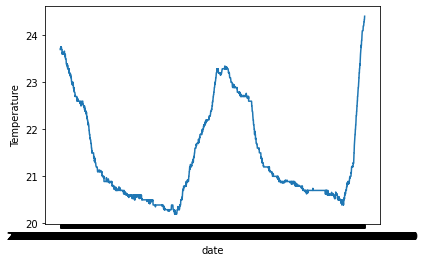

In [65]:
print(data)
sns.lineplot(data=data,x='date',y='Temperature')

<AxesSubplot:xlabel='date', ylabel='Humidity'>

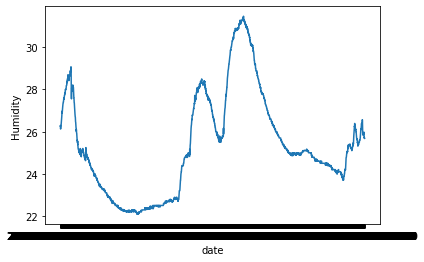

In [66]:
sns.lineplot(data=data,x='date',y='Humidity')

<AxesSubplot:xlabel='date', ylabel='Light'>

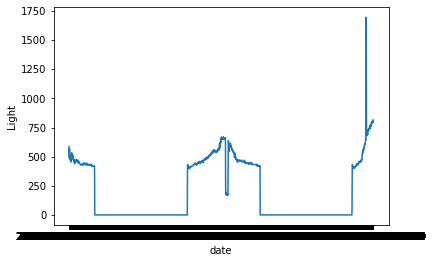

In [67]:
sns.lineplot(data=data,x='date',y='Light')

<AxesSubplot:xlabel='date', ylabel='CO2'>

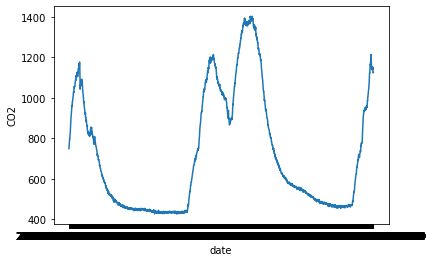

In [68]:
sns.lineplot(data=data,x='date',y='CO2')

<AxesSubplot:xlabel='date', ylabel='HumidityRatio'>

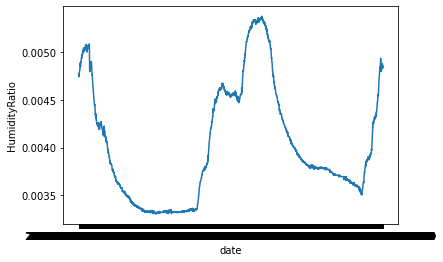

In [69]:
sns.lineplot(data=data,x='date',y='HumidityRatio')

<AxesSubplot:xlabel='date', ylabel='Occupancy'>

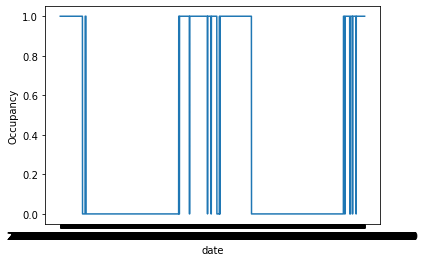

In [70]:
sns.lineplot(data=data,x='date',y='Occupancy')

<AxesSubplot:>

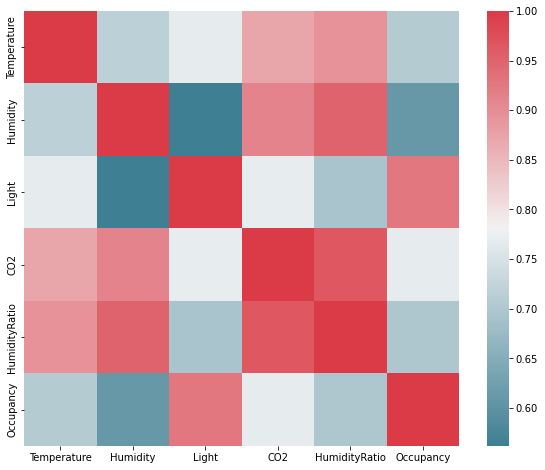

In [71]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

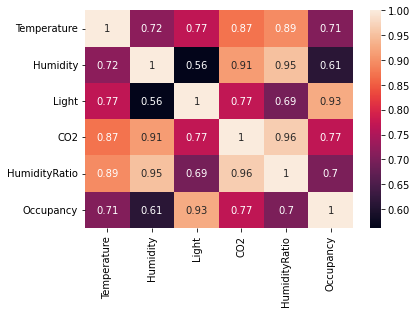

In [72]:
sns.heatmap(corr, annot = True)
plt.show()

In [73]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [74]:
data['Temperature'].describe()

count    2665.000000
mean       21.433876
std         1.028024
min        20.200000
25%        20.650000
50%        20.890000
75%        22.356667
max        24.408333
Name: Temperature, dtype: float64

In [75]:
data['Humidity'].describe()

count    2665.000000
mean       25.353937
std         2.436842
min        22.100000
25%        23.260000
50%        25.000000
75%        26.856667
max        31.472500
Name: Humidity, dtype: float64

In [76]:
data['Light'].describe()

count    2665.000000
mean      193.227556
std       250.210906
min         0.000000
25%         0.000000
50%         0.000000
75%       442.500000
max      1697.250000
Name: Light, dtype: float64

In [77]:
data['CO2'].describe()

count    2665.000000
mean      717.906470
std       292.681718
min       427.500000
25%       466.000000
50%       580.500000
75%       956.333333
max      1402.250000
Name: CO2, dtype: float64

In [78]:
data['HumidityRatio'].describe()

count    2665.000000
mean        0.004027
std         0.000611
min         0.003303
25%         0.003529
50%         0.003815
75%         0.004532
max         0.005378
Name: HumidityRatio, dtype: float64

In [79]:
data['Occupancy'].describe()

count    2665.000000
mean        0.364728
std         0.481444
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Occupancy, dtype: float64

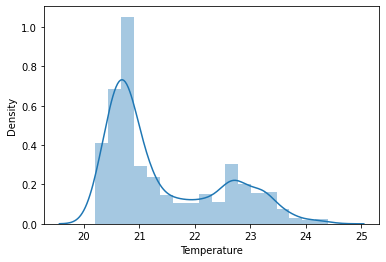

In [80]:
sns.distplot(data['Temperature']);

In [81]:
print("Skewness: %f" % data['Temperature'].skew())
print("Kurtosis: %f" % data['Temperature'].kurt())

Skewness: 0.842562
Kurtosis: -0.628995


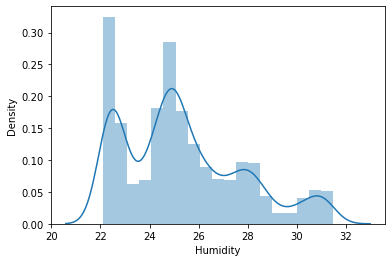

In [82]:
sns.distplot(data['Humidity']);

In [83]:
print("Skewness: %f" % data['Humidity'].skew())
print("Kurtosis: %f" % data['Humidity'].kurt())

Skewness: 0.672762
Kurtosis: -0.272580


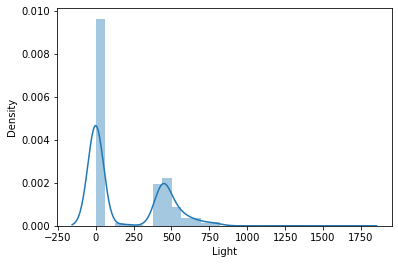

In [84]:
sns.distplot(data['Light']);

In [85]:
print("Skewness: %f" % data['Light'].skew())
print("Kurtosis: %f" % data['Light'].kurt())

Skewness: 0.759940
Kurtosis: -0.538937


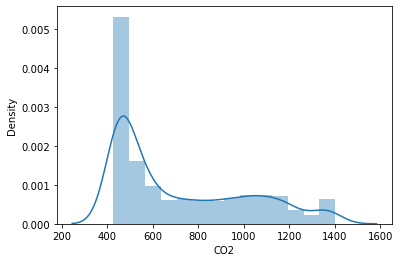

In [86]:
sns.distplot(data['CO2']);

In [87]:
print("Skewness: %f" % data['CO2'].skew())
print("Kurtosis: %f" % data['CO2'].kurt())

Skewness: 0.787597
Kurtosis: -0.727056


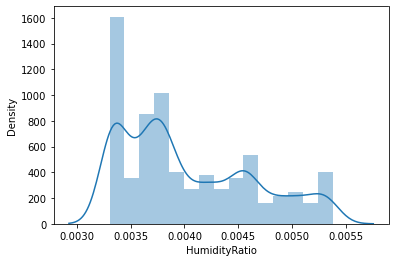

In [88]:
sns.distplot(data['HumidityRatio']);

In [89]:
print("Skewness: %f" % data['HumidityRatio'].skew())
print("Kurtosis: %f" % data['HumidityRatio'].kurt())

Skewness: 0.649385
Kurtosis: -0.729942


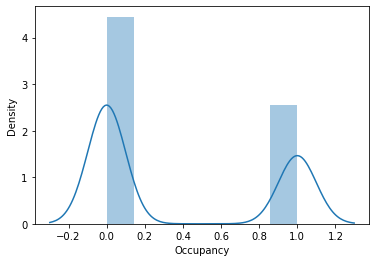

In [90]:
sns.distplot(data['Occupancy']);

In [91]:
print("Skewness: %f" % data['Occupancy'].skew())
print("Kurtosis: %f" % data['Occupancy'].kurt())
print(data)

Skewness: 0.562365
Kurtosis: -1.685011
                     date  Temperature   Humidity       Light          CO2  \
140   2015-02-02 14:19:00    23.700000  26.272000  585.200000   749.200000   
141   2015-02-02 14:19:59    23.718000  26.290000  578.400000   760.400000   
142   2015-02-02 14:21:00    23.730000  26.230000  572.666667   769.666667   
143   2015-02-02 14:22:00    23.722500  26.125000  493.750000   774.750000   
144   2015-02-02 14:23:00    23.754000  26.200000  488.600000   779.000000   
...                   ...          ...        ...         ...          ...   
2800  2015-02-04 10:38:59    24.290000  25.700000  808.000000  1150.250000   
2801  2015-02-04 10:40:00    24.330000  25.736000  809.800000  1129.200000   
2802  2015-02-04 10:40:59    24.330000  25.700000  817.000000  1125.800000   
2803  2015-02-04 10:41:59    24.356667  25.700000  813.000000  1123.000000   
2804  2015-02-04 10:43:00    24.408333  25.681667  798.000000  1124.000000   

      HumidityRatio  Occ

In [92]:
data.loc[data['Temperature'] < 15 ,'Temperature'] = 20.200000
data.loc[data['Temperature'] > 25,'Temperature'] = 20.200000

In [93]:
data.loc[data['Humidity'] < 20.5,'Humidity'] = 25.353937
data.loc[data['Humidity'] >33.0,'Humidity'] = 25.353937

In [94]:
data.loc[data['Light'] < -150,'Light'] = 193.227556
data.loc[data['Light'] > 1800,'Light'] = 193.227556

In [95]:
data.loc[data['CO2'] < 220,'CO2'] = 20.200000
data.loc[data['CO2'] > 1600 ,'CO2'] = 20.200000

In [96]:
data.loc[data['HumidityRatio'] < 0.0025,'HumidityRatio'] = 0.004027
data.loc[data['HumidityRatio'] > 0.0065 ,'HumidityRatio'] = 0.004027

In [97]:
data.loc[data['Occupancy'] < -0.4,'Occupancy'] = 0.364728
data.loc[data['Occupancy'] > 1.4 ,'Occupancy'] = 0.364728

In [98]:
data.isnull().values.any()

False

In [99]:
feature_names = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']
X = data[feature_names]
y = data.Occupancy

In [100]:
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target

In [101]:
X = X.astype(int)

In [102]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
extra_tree_forest.fit(X, y)

ExtraTreesClassifier(criterion='entropy', max_features=2, n_estimators=5)

In [103]:
feature_importance = extra_tree_forest.feature_importances_
  
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

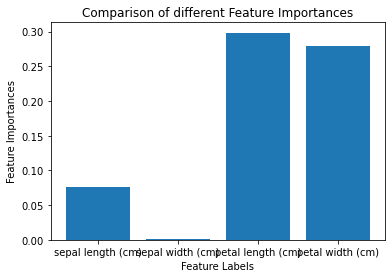

In [104]:
plt.bar(iris_dataset.feature_names, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [105]:
test_date1, test_date2 = datetime(2015, 2, 2), datetime(2015, 2, 4)
  
# printing dates
print("The original range : " + str(test_date1) + " " + str(test_date2))
  
# generating dates
dates = (test_date1 + timedelta(idx + 1)
         for idx in range((test_date2 - test_date1).days))
  
# summing all weekdays
res = sum(1 for day in dates if day.weekday() < 5)
  
# printing
print("Total business days in range : " + str(res))

The original range : 2015-02-02 00:00:00 2015-02-04 00:00:00
Total business days in range : 2


In [106]:
s = pd.date_range('2015-02-02', '2015-02-04', freq='D').to_series()
s.dt.dayofweek

2015-02-02    0
2015-02-03    1
2015-02-04    2
Freq: D, dtype: int64

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [109]:
X = data.iloc[:,1:6]
y = data['Occupancy']
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=23)
regressor = LinearRegression()
regressor.fit(X_test, y_test)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_test, y_test)
y_pred = classifier.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)
ac1 = accuracy_score(y_test, y_pred)
pre1 = precision_score(y_test, y_pred)
rec1 = recall_score(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm1)
print ("Accuracy : ", ac1)
print ("Precision: ", pre1)
print ("Recall: ", rec1)


Confusion Matrix : 
 [[316  13]
 [  0 204]]
Accuracy :  0.975609756097561
Precision:  0.9400921658986175
Recall:  1.0


In [110]:
myTable = PrettyTable(["Results"])
 
myTable.add_row([ac1])
myTable.add_row([cm1])
myTable.add_row([pre1])
myTable.add_row([rec1])
 
print(myTable)

+--------------------+
|      Results       |
+--------------------+
| 0.975609756097561  |
|     [[316  13]     |
|     [  0 204]]     |
| 0.9400921658986175 |
|        1.0         |
+--------------------+


In [111]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return(mae)

In [112]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


In [113]:
data2 = pd.read_csv("datatest2.csv")

In [114]:
data2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [115]:
data2.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [116]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [117]:
data2.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [118]:
data2.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [119]:
# Verilerin Görselleştirilmesi

<AxesSubplot:xlabel='date', ylabel='Temperature'>

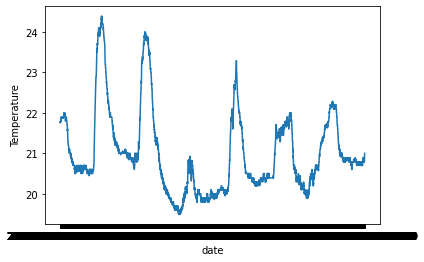

In [120]:
sns.lineplot(data=data2,x='date',y='Temperature')

<AxesSubplot:xlabel='date', ylabel='Humidity'>

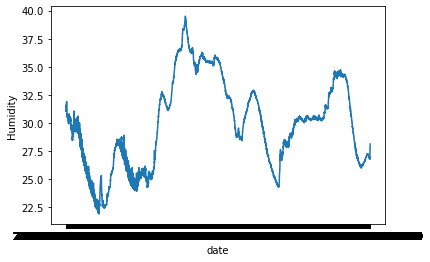

In [121]:
sns.lineplot(data=data2,x='date',y='Humidity')

<AxesSubplot:xlabel='date', ylabel='Light'>

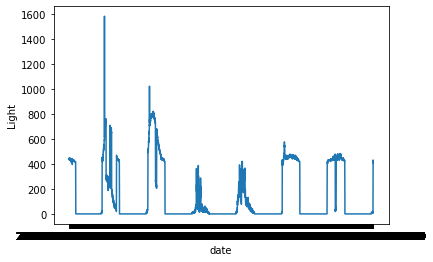

In [122]:
sns.lineplot(data=data2,x='date',y='Light')

<AxesSubplot:xlabel='date', ylabel='CO2'>

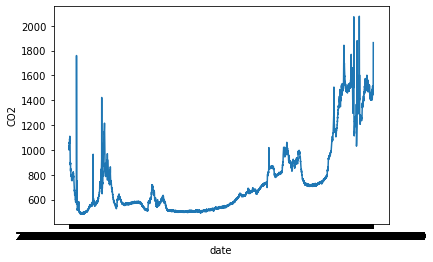

In [123]:
sns.lineplot(data=data2,x='date',y='CO2')

<AxesSubplot:xlabel='date', ylabel='HumidityRatio'>

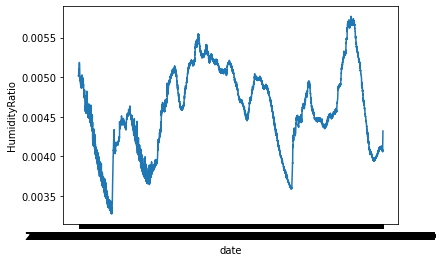

In [124]:
sns.lineplot(data=data2,x='date',y='HumidityRatio')

<AxesSubplot:xlabel='date', ylabel='Occupancy'>

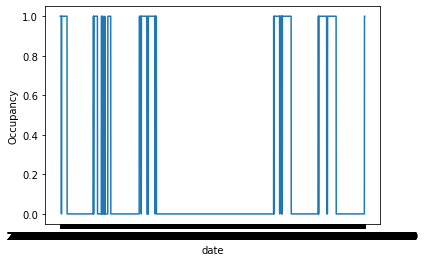

In [125]:
sns.lineplot(data=data2,x='date',y='Occupancy')

<AxesSubplot:>

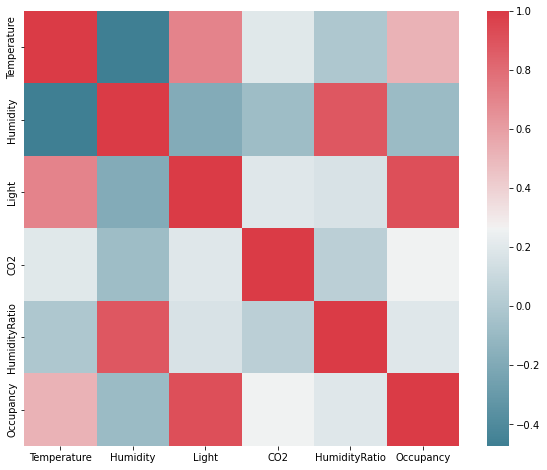

In [126]:
f, ax = plt.subplots(figsize=(10, 8))
corr2 = data2.corr()
sns.heatmap(corr2, mask=np.zeros_like(corr2, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

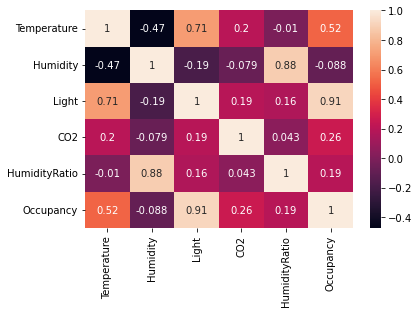

In [127]:
sns.heatmap(corr2, annot = True)
plt.show()

In [128]:
data2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [129]:
data2['Temperature'].describe()

count    9752.000000
mean       21.001768
std         1.020693
min        19.500000
25%        20.290000
50%        20.790000
75%        21.533333
max        24.390000
Name: Temperature, dtype: float64

In [130]:
data2['Humidity'].describe()

count    9752.000000
mean       29.891910
std         3.952844
min        21.865000
25%        26.642083
50%        30.200000
75%        32.700000
max        39.500000
Name: Humidity, dtype: float64

In [131]:
data2['Light'].describe()

count    9752.000000
mean      123.067930
std       208.221275
min         0.000000
25%         0.000000
50%         0.000000
75%       208.250000
max      1581.000000
Name: Light, dtype: float64

In [132]:
data2['CO2'].describe()

count    9752.000000
mean      753.224832
std       297.096114
min       484.666667
25%       542.312500
50%       639.000000
75%       831.125000
max      2076.500000
Name: CO2, dtype: float64

In [133]:
data2['HumidityRatio'].describe()

count    9752.000000
mean        0.004589
std         0.000531
min         0.003275
25%         0.004196
50%         0.004593
75%         0.004998
max         0.005769
Name: HumidityRatio, dtype: float64

In [134]:
data2['Occupancy'].describe()

count    9752.000000
mean        0.210111
std         0.407408
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Occupancy, dtype: float64

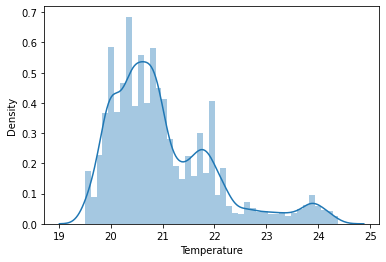

In [135]:
sns.distplot(data2['Temperature']);

In [136]:
print("Skewness: %f" % data2['Temperature'].skew())
print("Kurtosis: %f" % data2['Temperature'].kurt())

Skewness: 1.228301
Kurtosis: 1.270792


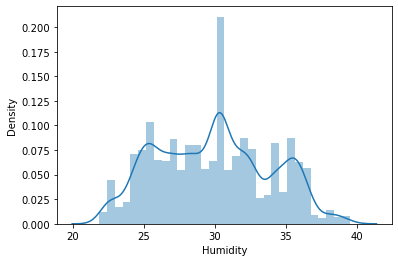

In [137]:
sns.distplot(data2['Humidity']);

In [138]:
print("Skewness: %f" % data2['Humidity'].skew())
print("Kurtosis: %f" % data2['Humidity'].kurt())

Skewness: 0.119257
Kurtosis: -0.850902


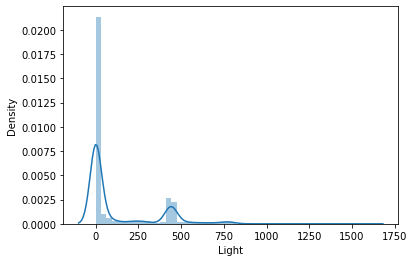

In [139]:
sns.distplot(data2['Light']);

In [140]:
print("Skewness: %f" % data2['Light'].skew())
print("Kurtosis: %f" % data2['Light'].kurt())

Skewness: 1.512123
Kurtosis: 1.230746


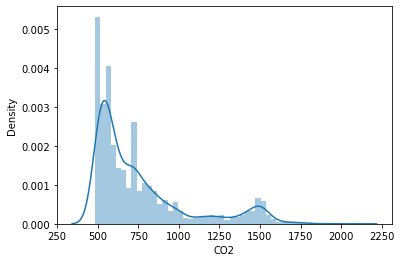

In [141]:
sns.distplot(data2['CO2']);

In [142]:
print("Skewness: %f" % data2['CO2'].skew())
print("Kurtosis: %f" % data2['CO2'].kurt())

Skewness: 1.545384
Kurtosis: 1.480166


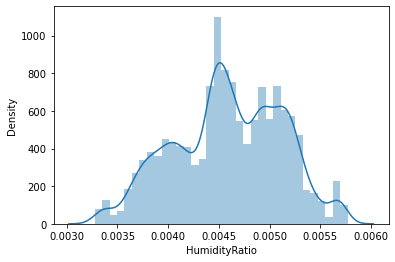

In [143]:
sns.distplot(data2['HumidityRatio']);

In [144]:
print("Skewness: %f" % data2['HumidityRatio'].skew())
print("Kurtosis: %f" % data2['HumidityRatio'].kurt())

Skewness: -0.166972
Kurtosis: -0.611207


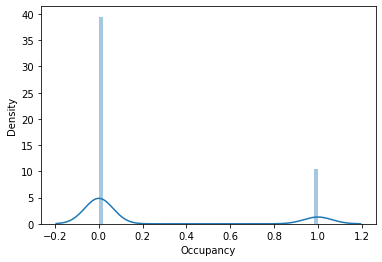

In [145]:
sns.distplot(data2['Occupancy']);

In [146]:
print("Skewness: %f" % data2['Occupancy'].skew())
print("Kurtosis: %f" % data2['Occupancy'].kurt())

Skewness: 1.423383
Kurtosis: 0.026024


In [147]:
data2.loc[data2['Temperature'] < 19 ,'Temperature'] = 21.001768
data2.loc[data2['Temperature'] > 25,'Temperature'] = 21.001768

In [148]:
data2.loc[data2['Humidity'] < 20 ,'Humidity'] = 29.891910
data2.loc[data2['Humidity'] > 43,'Humidity'] = 29.891910

In [149]:
data2.loc[data2['Light'] < -125 ,'Light'] = 123.067930
data2.loc[data2['Light'] > 1700,'Light'] = 123.067930

In [150]:
data2.loc[data2['CO2'] < 325 ,'CO2'] = 753.224832
data2.loc[data2['CO2'] > 2150,'CO2'] = 753.224832

In [151]:
data2.loc[data2['HumidityRatio'] < 0.0030 ,'HumidityRatio'] = 0.004589
data2.loc[data2['HumidityRatio'] > 0.0060,'HumidityRatio'] = 0.004589

In [152]:
data2.loc[data2['Occupancy'] < -0.2 ,'Occupancy'] = 0.210111
data2.loc[data2['Occupancy'] > 1.2,'Occupancy'] = 0.210111

In [153]:
data2.isnull().values.any()

False

In [154]:
feature_names = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']
X = data2[feature_names]
y = data2.Occupancy

In [155]:
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target

In [156]:
X = X.astype(int)

In [157]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
extra_tree_forest.fit(X, y)

ExtraTreesClassifier(criterion='entropy', max_features=2, n_estimators=5)

In [158]:
feature_importance = extra_tree_forest.feature_importances_
  
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

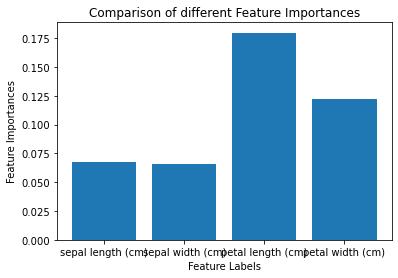

In [159]:
plt.bar(iris_dataset.feature_names, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [160]:
test_date1, test_date2 = datetime(2015, 2, 11), datetime(2015, 2, 18)
  
# printing dates
print("The original range : " + str(test_date1) + " " + str(test_date2))
  
# generating dates
dates = (test_date1 + timedelta(idx + 1)
         for idx in range((test_date2 - test_date1).days))
  
# summing all weekdays
res = sum(1 for day in dates if day.weekday() < 5)
  
# printing
print("Total business days in range : " + str(res))

The original range : 2015-02-11 00:00:00 2015-02-18 00:00:00
Total business days in range : 5


In [161]:
s2 = pd.date_range('2015-02-11', '2015-02-18', freq='D').to_series()
s2.dt.dayofweek
# 0:Monday...6:Sunday 

2015-02-11    2
2015-02-12    3
2015-02-13    4
2015-02-14    5
2015-02-15    6
2015-02-16    0
2015-02-17    1
2015-02-18    2
Freq: D, dtype: int64

In [162]:
X2 = data2.iloc[:,1:6]
y2 = data2['Occupancy']
num_test = 0.20
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=num_test, random_state=23)
regressor = LinearRegression()
regressor.fit(X2_test, y2_test)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X2_test, y2_test)
y2_pred = classifier.predict(X2_test)
cm2 = confusion_matrix(y2_test, y2_pred)
ac2 = accuracy_score(y2_test, y2_pred)
pre2 = precision_score(y2_test, y2_pred)
rec2 = recall_score(y2_test, y2_pred)
print ("Confusion Matrix : \n", cm2)
print ("Accuracy : ", ac2)
print ("Precision: ", pre2)
print ("Recall: ", rec2)

Confusion Matrix : 
 [[1542   14]
 [   1  394]]
Accuracy :  0.9923116350589442
Precision:  0.9656862745098039
Recall:  0.9974683544303797


In [163]:
myTable = PrettyTable(["Results"])
 
myTable.add_row([ac2])
myTable.add_row([cm2])
myTable.add_row([pre2])
myTable.add_row([rec2])
 
print(myTable)

+--------------------+
|      Results       |
+--------------------+
| 0.9923116350589442 |
|    [[1542   14]    |
|    [   1  394]]    |
| 0.9656862745098039 |
| 0.9974683544303797 |
+--------------------+


In [164]:
def get_mae(max_leaf_nodes, X2_train, X2_test, y2_train, y2_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X2_train, y2_train)
    y2_pred = model.predict(X2_test)
    mae = mean_absolute_error(y2_test, y2_pred)
    return(mae)

In [165]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, X2_train, X2_test, y2_train, y2_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


In [166]:
data3 = pd.read_csv("datatraining.csv")

In [167]:
data3.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [168]:
data3['Temperature'].describe()

count    8143.000000
mean       20.619084
std         1.016916
min        19.000000
25%        19.700000
50%        20.390000
75%        21.390000
max        23.180000
Name: Temperature, dtype: float64

In [169]:
data3['Humidity'].describe()

count    8143.000000
mean       25.731507
std         5.531211
min        16.745000
25%        20.200000
50%        26.222500
75%        30.533333
max        39.117500
Name: Humidity, dtype: float64

In [170]:
data3['Light'].describe()

count    8143.000000
mean      119.519375
std       194.755805
min         0.000000
25%         0.000000
50%         0.000000
75%       256.375000
max      1546.333333
Name: Light, dtype: float64

In [171]:
data3['CO2'].describe()

count    8143.000000
mean      606.546243
std       314.320877
min       412.750000
25%       439.000000
50%       453.500000
75%       638.833333
max      2028.500000
Name: CO2, dtype: float64

In [172]:
data3['HumidityRatio'].describe()

count    8143.000000
mean        0.003863
std         0.000852
min         0.002674
25%         0.003078
50%         0.003801
75%         0.004352
max         0.006476
Name: HumidityRatio, dtype: float64

In [173]:
data3['Occupancy'].describe()

count    8143.000000
mean        0.212330
std         0.408982
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Occupancy, dtype: float64

In [174]:
data3.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [175]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [176]:
data3.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [177]:
data3.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [178]:
#Verilerin Görselleştirilmesi

In [179]:
data3.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


                     date  Temperature  Humidity  Light         CO2  \
1     2015-02-04 17:51:00        23.18   27.2720  426.0  721.250000   
2     2015-02-04 17:51:59        23.15   27.2675  429.5  714.000000   
3     2015-02-04 17:53:00        23.15   27.2450  426.0  713.500000   
4     2015-02-04 17:54:00        23.15   27.2000  426.0  708.250000   
5     2015-02-04 17:55:00        23.10   27.2000  426.0  704.500000   
...                   ...          ...       ...    ...         ...   
8139  2015-02-10 09:29:00        21.05   36.0975  433.0  787.250000   
8140  2015-02-10 09:29:59        21.05   35.9950  433.0  789.500000   
8141  2015-02-10 09:30:59        21.10   36.0950  433.0  798.500000   
8142  2015-02-10 09:32:00        21.10   36.2600  433.0  820.333333   
8143  2015-02-10 09:33:00        21.10   36.2000  447.0  821.000000   

      HumidityRatio  Occupancy  
1          0.004793          1  
2          0.004783          1  
3          0.004779          1  
4          0.00

<AxesSubplot:xlabel='date', ylabel='Temperature'>

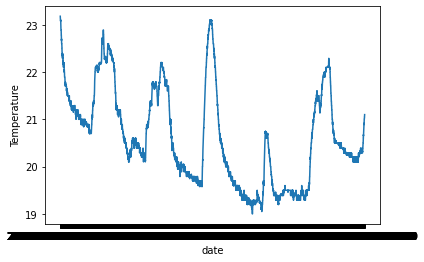

In [180]:
print(data3)
sns.lineplot(data=data3,x='date',y='Temperature')

In [181]:
print("Skewness: %f" % data3['Temperature'].skew())
print("Kurtosis: %f" % data3['Temperature'].kurt())

Skewness: 0.450868
Kurtosis: -0.810242


<AxesSubplot:xlabel='date', ylabel='Humidity'>

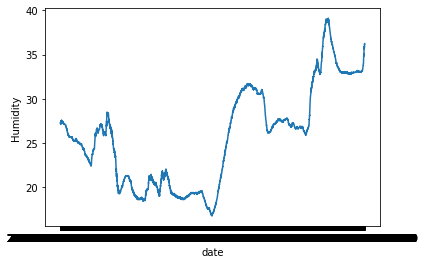

In [182]:
sns.lineplot(data=data3,x='date',y='Humidity')

In [183]:
print("Skewness: %f" % data3['Humidity'].skew())
print("Kurtosis: %f" % data3['Humidity'].kurt())

Skewness: 0.272018
Kurtosis: -0.931880


<AxesSubplot:xlabel='date', ylabel='Light'>

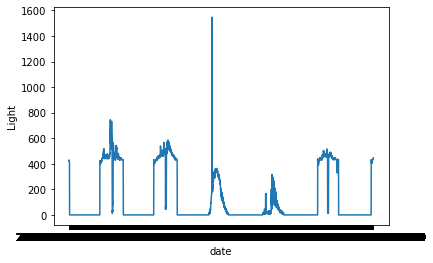

In [184]:
sns.lineplot(data=data3,x='date',y='Light')

In [185]:
print("Skewness: %f" % data3['Light'].skew())
print("Kurtosis: %f" % data3['Light'].kurt())

Skewness: 1.237440
Kurtosis: 0.123152


<AxesSubplot:xlabel='date', ylabel='CO2'>

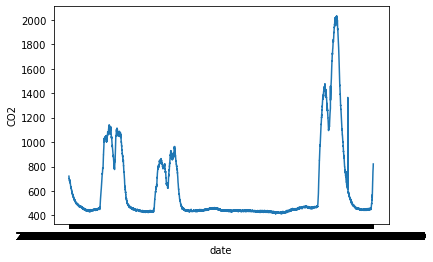

In [186]:
sns.lineplot(data=data3,x='date',y='CO2')

In [187]:
print("Skewness: %f" % data3['CO2'].skew())
print("Kurtosis: %f" % data3['CO2'].kurt())

Skewness: 2.380910
Kurtosis: 5.775411


<AxesSubplot:xlabel='date', ylabel='HumidityRatio'>

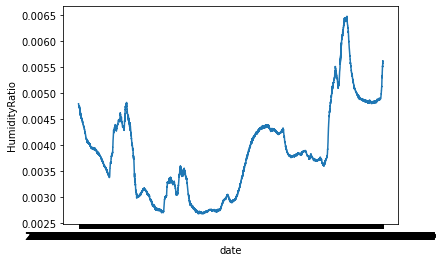

In [188]:
sns.lineplot(data=data3,x='date',y='HumidityRatio')

In [189]:
print("Skewness: %f" % data3['HumidityRatio'].skew())
print("Kurtosis: %f" % data3['HumidityRatio'].kurt())

Skewness: 0.616681
Kurtosis: 0.039355


<AxesSubplot:xlabel='date', ylabel='Occupancy'>

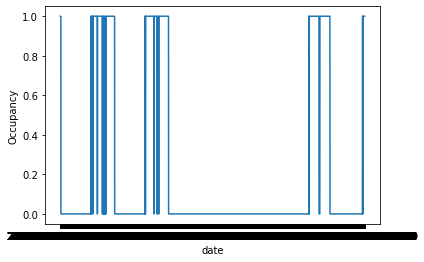

In [190]:
sns.lineplot(data=data3,x='date',y='Occupancy')

<AxesSubplot:>

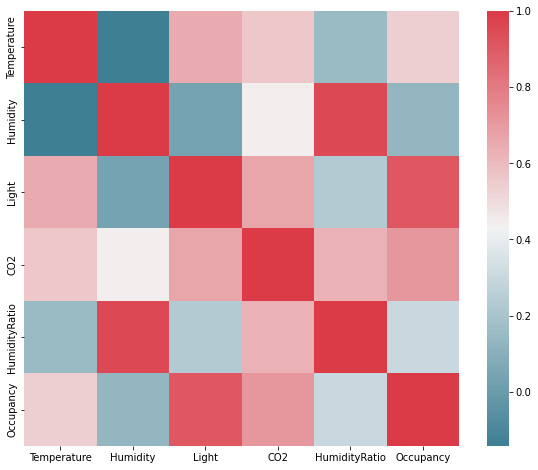

In [191]:
f, ax = plt.subplots(figsize=(10, 8))
corr3 = data3.corr()
sns.heatmap(corr3, mask=np.zeros_like(corr3, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

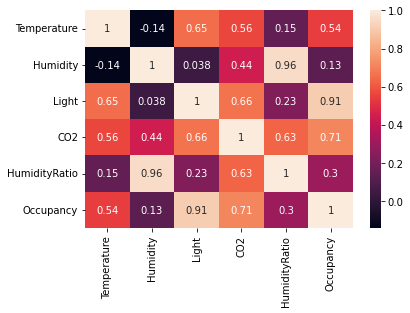

In [192]:
sns.heatmap(corr3, annot = True)
plt.show()

In [193]:
print("Skewness: %f" % data3['Occupancy'].skew())
print("Kurtosis: %f" % data3['Occupancy'].kurt())

Skewness: 1.407109
Kurtosis: -0.020050


In [194]:
data3.loc[data3['Temperature'] < 19 ,'Temperature'] = 20.619084
data3.loc[data3['Temperature'] > 23,'Temperature'] = 20.619084

In [195]:
data3.loc[data3['Humidity'] < 15 ,'Humidity'] = 25.731507
data3.loc[data3['Humidity'] > 38,'Humidity'] = 25.731507

In [196]:
data3.loc[data3['Light'] < 0 ,'Light'] = 119.519375
data3.loc[data3['Light'] > 1500,'Light'] = 119.519375

In [197]:
data3.loc[data3['CO2'] < 400 ,'CO2'] = 606.546243
data3.loc[data3['CO2'] > 2000,'CO2'] = 606.546243

In [198]:
data3.loc[data3['HumidityRatio'] < 0.0027,'HumidityRatio'] = 0.003863
data3.loc[data3['HumidityRatio'] > 0.0063,'HumidityRatio'] = 0.003863

In [199]:
data3.loc[data3['Occupancy'] < 0,'Occupancy'] = 0.212330
data3.loc[data3['Occupancy'] > 1,'Occupancy'] = 0.212330

In [200]:
data3.isnull().values.any()

False

In [201]:
print('Train columns with null values:\n', data.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data2.isnull().sum())
print("-"*10)


data3.describe(include = 'all')

Train columns with null values:
 date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64
----------
Test/Validation columns with null values:
 date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64
----------


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
unique,8143,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-02-04 17:51:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,20.597565,25.535670,119.344155,599.459182,0.003847,0.212330
std,NaN,0.990219,5.292933,194.112741,297.943566,0.000790,0.408982
min,NaN,19.000000,16.745000,0.000000,412.750000,0.002700,0.000000
25%,NaN,19.700000,20.200000,0.000000,439.000000,0.003119,0.000000
50%,NaN,20.390000,26.100000,0.000000,453.500000,0.003815,0.000000
75%,NaN,21.315000,30.000000,255.750000,627.250000,0.004333,0.000000


In [202]:
feature_names = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']
X = data3[feature_names]
y = data3.Occupancy

In [203]:
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target

In [204]:
X = X.astype(int)

In [205]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
extra_tree_forest.fit(X, y)

ExtraTreesClassifier(criterion='entropy', max_features=2, n_estimators=5)

In [206]:
feature_importance = extra_tree_forest.feature_importances_
  
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

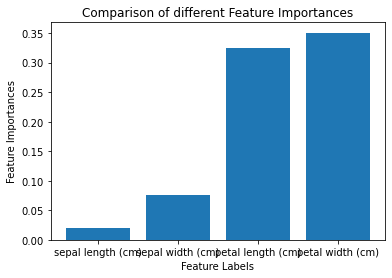

In [207]:
plt.bar(iris_dataset.feature_names, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [208]:
test_date1, test_date2 = datetime(2015, 2, 4), datetime(2015, 2, 10)
  
# printing dates
print("The original range : " + str(test_date1) + " " + str(test_date2))
  
# generating dates
dates = (test_date1 + timedelta(idx + 1)
         for idx in range((test_date2 - test_date1).days))
  
# summing all weekdays
res = sum(1 for day in dates if day.weekday() < 5)
  
# printing
print("Total business days in range : " + str(res))

The original range : 2015-02-04 00:00:00 2015-02-10 00:00:00
Total business days in range : 4


In [209]:
s3 = pd.date_range('2015-02-04', '2015-02-10', freq='D').to_series()
s3.dt.dayofweek
# 0:Monday...6:Sunday 

2015-02-04    2
2015-02-05    3
2015-02-06    4
2015-02-07    5
2015-02-08    6
2015-02-09    0
2015-02-10    1
Freq: D, dtype: int64

In [210]:
X3 = data3.iloc[:,1:6]
y3 = data3['Occupancy']
num_test = 0.20
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=num_test, random_state=23)
regressor = LinearRegression()
regressor.fit(X3_test, y3_test)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X3_test, y3_test)
y3_pred = classifier.predict(X3_test)
cm3 = confusion_matrix(y3_test, y3_pred)
ac3 = accuracy_score(y2_test, y2_pred)
pre3 = precision_score(y2_test, y2_pred)
rec3 = recall_score(y2_test, y2_pred)
 
print ("Confusion Matrix : \n", cm3)
print ("Accuracy : ", ac3)
print ("Precision: ", pre3)
print ("Recall: ", rec3)

Confusion Matrix : 
 [[1284   14]
 [   2  329]]
Accuracy :  0.9923116350589442
Precision:  0.9656862745098039
Recall:  0.9974683544303797


In [211]:
myTable = PrettyTable(["Results"])
 
myTable.add_row([ac3])
myTable.add_row([cm3])
myTable.add_row([pre3])
myTable.add_row([rec3])
 
print(myTable)

+--------------------+
|      Results       |
+--------------------+
| 0.9923116350589442 |
|    [[1284   14]    |
|    [   2  329]]    |
| 0.9656862745098039 |
| 0.9974683544303797 |
+--------------------+


In [212]:
def get_mae(max_leaf_nodes, X3_train, X3_test, y3_train, y3_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X3_train, y3_train)
    y3_pred = model.predict(X3_test)
    mae = mean_absolute_error(y3_test, y3_pred)
    return(mae)

In [213]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, X3_train, X3_test, y3_train, y3_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0
